In [2]:
import os
import subprocess
import dotenv
from pathlib import Path

# autoreload any .py scripts
%load_ext autoreload
%autoreload 2

# set the project's root directory as the notebooks' working directory
git_root = subprocess.run(
    ["git", "rev-parse", "--show-toplevel"], capture_output=True, text=True
).stdout.strip()

os.chdir(git_root)
print(git_root)

env_path = Path(git_root, "backend")
print(env_path)

/Users/nilsgandlau/code/hackathon-dc-aegis
/Users/nilsgandlau/code/hackathon-dc-aegis/backend


## merging flu data

In [ ]:
import src.social_media as social_media
import src.health_data as utils

social_df = social_media.fetch_disease_data("flu")
cdc_df = utils.fetch_disease_data("flu")

In [15]:
import pandas as pd


social_df.head()
social_df["date"] = pd.to_datetime(social_df["date"]).dt.date
social_df.rename(columns={"value": "social_media_value"}, inplace=True)

In [16]:
cdc_df.head()
cdc_df["date"] = pd.to_datetime(cdc_df["date"]).dt.date
cdc_df.rename(columns={"cases": "number_of_cases"}, inplace=True)

In [19]:
import pandas as pd


df_merged =pd.merge(cdc_df, social_df, on="date", how="left")
df_merged.head()

,date,number_of_cases,social_media_value
0,2025-01-07,164789,9939
1,2025-01-14,139867,12730
2,2025-01-21,156848,14620
3,2025-01-28,179654,14781
4,2025-02-04,214953,11669


<Axes: >

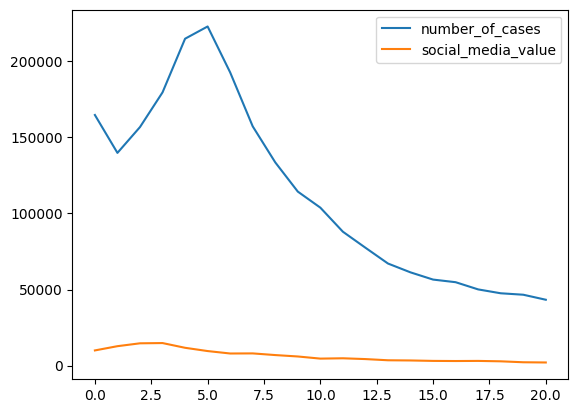

In [20]:
df_merged.plot()

## merging measles data

In [34]:
import src.social_media as social_media
import src.health_data as utils

social_df = social_media.fetch_disease_data("measles")
cdc_df = utils.fetch_disease_data("measles")

In [36]:
pd.merge(cdc_df, social_df, on="date", how="left")

,date,num_cases,social_media_value
0,2025-01-06,2,171
1,2025-01-13,16,171
2,2025-01-20,24,171
3,2025-01-27,31,270
4,2025-02-03,40,232
5,2025-02-10,52,288
6,2025-02-17,54,300
7,2025-02-24,67,464
8,2025-03-03,73,478
9,2025-03-10,81,563


In [22]:
print(social_df.dtypes)
social_df["date"] = pd.to_datetime(social_df["date"])
social_df.head()

date                  object
cases                  int64
social_media_value     int64
date_str              object
dtype: object


,date,cases,social_media_value,date_str
0,2025-01-06,2,171,2025-01-06
1,2025-01-13,16,171,2025-01-13
2,2025-01-20,24,171,2025-01-20
3,2025-01-27,31,270,2025-01-27
4,2025-02-03,40,232,2025-02-03


In [17]:
print(cdc_df.dtypes)
cdc_df["date_str"] = pd.to_datetime(cdc_df["date"]).dt.strftime("%Y-%m-%d")
cdc_df.head()

date         object
num_cases     int64
dtype: object


,date,num_cases,date_str
0,2025-01-06,2,2025-01-06
1,2025-01-13,16,2025-01-13
2,2025-01-20,24,2025-01-20
3,2025-01-27,31,2025-01-27
4,2025-02-03,40,2025-02-03


In [21]:
cdc_df.date

0     2025-01-06
1     2025-01-13
2     2025-01-20
3     2025-01-27
4     2025-02-03
5     2025-02-10
6     2025-02-17
7     2025-02-24
8     2025-03-03
9     2025-03-10
10    2025-03-17
11    2025-03-24
12    2025-03-31
13    2025-04-07
14    2025-04-14
15    2025-04-21
16    2025-04-28
17    2025-05-05
18    2025-05-12
19    2025-05-19
20    2025-05-26
Name: date, dtype: object

In [18]:
import pandas as pd
pd.merge(cdc_df, social_df, on="date_str", how="left")

,date_x,num_cases,date_str,date_y,cases,social_media_value
0,2025-01-06,2,2025-01-06,2025-01-06,2,171
1,2025-01-13,16,2025-01-13,2025-01-13,16,171
2,2025-01-20,24,2025-01-20,2025-01-20,24,171
3,2025-01-27,31,2025-01-27,2025-01-27,31,270
4,2025-02-03,40,2025-02-03,2025-02-03,40,232
5,2025-02-10,52,2025-02-10,2025-02-10,52,288
6,2025-02-17,54,2025-02-17,2025-02-17,54,300
7,2025-02-24,67,2025-02-24,2025-02-24,67,464
8,2025-03-03,73,2025-03-03,2025-03-03,73,478
9,2025-03-10,81,2025-03-10,2025-03-10,81,563
